In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import folium


In [2]:
api_key = "fb365aa6104829b44455572365ff3b4e"

In [6]:
base_url = "http://api.openweathermap.org/data/2.5/forecast"
city_name = "New York"
params = {
    "q": city_name,
    "appid": api_key,
    "units": "metric"
}
response = requests.get(base_url, params=params)
data = response.json()

response


<Response [200]>

In [7]:
data

{'cod': '200',
 'message': 0,
 'cnt': 40,
 'list': [{'dt': 1730127600,
   'main': {'temp': 12.18,
    'feels_like': 10.6,
    'temp_min': 12.18,
    'temp_max': 12.89,
    'pressure': 1031,
    'sea_level': 1031,
    'grnd_level': 1030,
    'humidity': 44,
    'temp_kf': -0.71},
   'weather': [{'id': 804,
     'main': 'Clouds',
     'description': 'overcast clouds',
     'icon': '04d'}],
   'clouds': {'all': 100},
   'wind': {'speed': 1.9, 'deg': 38, 'gust': 1.94},
   'visibility': 10000,
   'pop': 0,
   'sys': {'pod': 'd'},
   'dt_txt': '2024-10-28 15:00:00'},
  {'dt': 1730138400,
   'main': {'temp': 13.05,
    'feels_like': 11.43,
    'temp_min': 13.05,
    'temp_max': 14.8,
    'pressure': 1031,
    'sea_level': 1031,
    'grnd_level': 1029,
    'humidity': 39,
    'temp_kf': -1.75},
   'weather': [{'id': 804,
     'main': 'Clouds',
     'description': 'overcast clouds',
     'icon': '04d'}],
   'clouds': {'all': 90},
   'wind': {'speed': 1.98, 'deg': 132, 'gust': 1.88},
   'visibil

In [8]:
weather_data = data["list"]
timestamps = [entry["dt"] for entry in weather_data]
temperatures = [entry["main"]["temp"] for entry in weather_data]
humidity = [entry["main"]["humidity"] for entry in weather_data]
wind_speed = [entry["wind"]["speed"] for entry in weather_data]
weather_description = [item['weather'][0]['description'] for item in weather_data]

weather_data

[{'dt': 1730127600,
  'main': {'temp': 12.18,
   'feels_like': 10.6,
   'temp_min': 12.18,
   'temp_max': 12.89,
   'pressure': 1031,
   'sea_level': 1031,
   'grnd_level': 1030,
   'humidity': 44,
   'temp_kf': -0.71},
  'weather': [{'id': 804,
    'main': 'Clouds',
    'description': 'overcast clouds',
    'icon': '04d'}],
  'clouds': {'all': 100},
  'wind': {'speed': 1.9, 'deg': 38, 'gust': 1.94},
  'visibility': 10000,
  'pop': 0,
  'sys': {'pod': 'd'},
  'dt_txt': '2024-10-28 15:00:00'},
 {'dt': 1730138400,
  'main': {'temp': 13.05,
   'feels_like': 11.43,
   'temp_min': 13.05,
   'temp_max': 14.8,
   'pressure': 1031,
   'sea_level': 1031,
   'grnd_level': 1029,
   'humidity': 39,
   'temp_kf': -1.75},
  'weather': [{'id': 804,
    'main': 'Clouds',
    'description': 'overcast clouds',
    'icon': '04d'}],
  'clouds': {'all': 90},
  'wind': {'speed': 1.98, 'deg': 132, 'gust': 1.88},
  'visibility': 10000,
  'pop': 0,
  'sys': {'pod': 'd'},
  'dt_txt': '2024-10-28 18:00:00'},
 {'

In [9]:
datetime_objects = [pd.to_datetime(timestamp, unit="s") for timestamp in timestamps]

In [10]:
weather_df = pd.DataFrame({
'Timestamp': timestamps,
"Datetime": datetime_objects,
'Temperature': temperatures,
'humidity': humidity,
'wind_speed': wind_speed,
'weather_description': weather_description,
})

weather_df.set_index("Datetime", inplace=True)

weather_df

,Timestamp,Temperature,humidity,wind_speed,weather_description
Datetime,,,,,
2024-10-28 15:00:00,1730127600,12.18,44,1.90,overcast clouds
2024-10-28 18:00:00,1730138400,13.05,39,1.98,overcast clouds
2024-10-28 21:00:00,1730149200,13.47,40,3.66,broken clouds
2024-10-29 00:00:00,1730160000,13.25,49,3.71,broken clouds
2024-10-29 03:00:00,1730170800,12.95,54,2.95,clear sky
2024-10-29 06:00:00,1730181600,12.62,53,2.55,clear sky
2024-10-29 09:00:00,1730192400,11.99,58,1.57,few clouds
2024-10-29 12:00:00,1730203200,11.80,62,0.48,scattered clouds
2024-10-29 15:00:00,1730214000,15.56,56,3.40,broken clouds


In [11]:
precipitation = []
for entry in weather_data:
    rain = entry.get("rain", {}).get("3h", 0)
    snow = entry.get("snow", {}).get("3h", 0)
    total_precipitation = rain + snow
    precipitation.append(total_precipitation)

precipitation


[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 3.26,
 0.48,
 0,
 0,
 0,
 0,
 0,
 0]

In [12]:
avg_temp = sum(temperatures) / len(temperatures)
avg_temp


16.296999999999997

In [13]:
max_temp = max(temperatures)
max_temp

23.71

In [14]:
min_temp = min(temperatures)
min_temp


9.42

In [15]:
daily_mean_temp = weather_df['Temperature'].resample('D').mean()
daily_mean_humidity = weather_df['humidity'].resample('D').mean()
daily_mean_wind_speed = weather_df['wind_speed'].resample('D').mean()


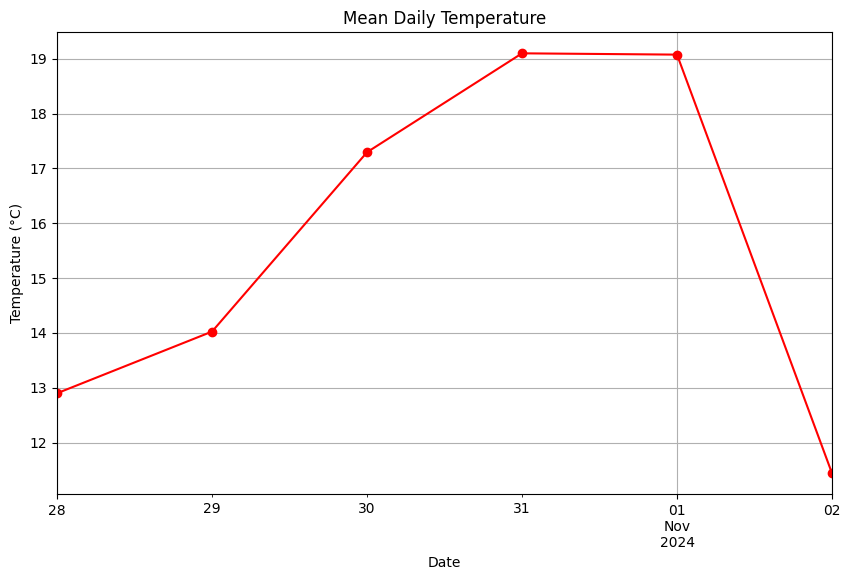

In [16]:
plt.figure(figsize=(10, 6))
daily_mean_temp.plot(color='red', linestyle='-', marker='o')
plt.title('Mean Daily Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.grid(True)

plt.show()

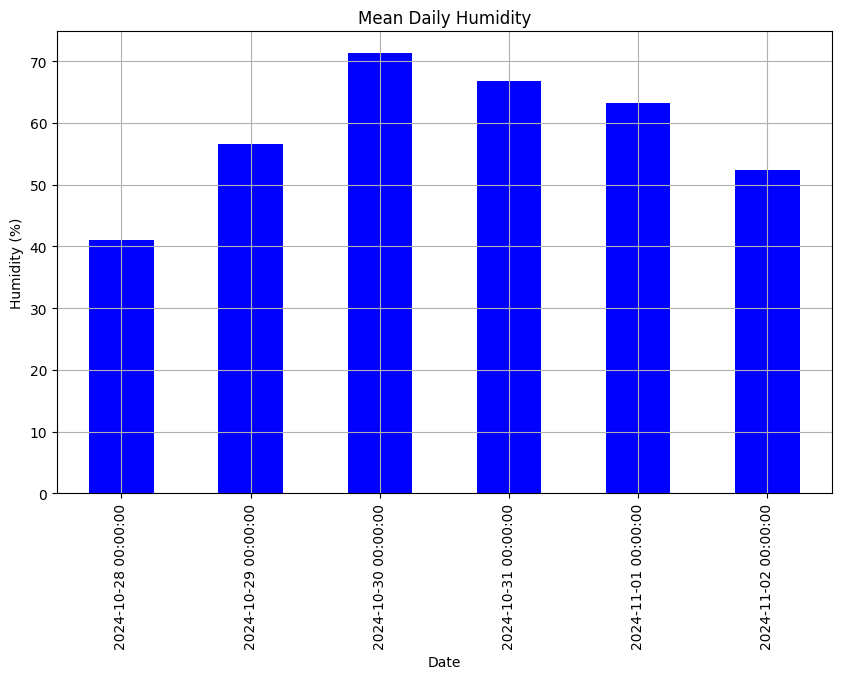

In [18]:
plt.figure(figsize=(10, 6))
daily_mean_humidity.plot(kind='bar', color='blue')
plt.title('Mean Daily Humidity')
plt.xlabel('Date')
plt.ylabel('Humidity (%)')
plt.grid(True)

plt.show()